# Project5 - Wrangle and Analyze Data
### by Lucas Aledi

<a id='table'></a>
## Table of Contents

* 1\. <a href="#intro">Introduction - "Why are you so mad Bront"</a>
* 2\. <a href="#wrangling">Data Wrangling</a>
    * 2.1. <a href="#gathering">Gathering Data</a>
    * 2.2. <a href="#assessing">Assessing Data</a>
    * 2.3. <a href="#cleaning">Cleaning Data</a>
* 3\. <a href="#eda">Exploratory Data Analysis (EDA)</a>
    * 3.1\.) <a href="#question1">What tweets got most and least engagement from the audience?</a>
        - 3.1.1\. Is there a difference in engagement for tweets with and without a dog image?
        - 3.1.2\. What dog breed created most and least engagement?
    * 3.2\.) <a href="#question2">Do dog breeds, on average, get rated differently?</a> 
    * 3.3\.) <a href="#question3">Is there a correlation between rate and engagement?</a>
* 4\. <a href="#conclusions">Conclusions - "They are good dogs Brent"</a>
* 5\. <a href="#report">Reporting</a>
* 6\. <a href="#references">References</a>

<a id='intro'></a>
## 1. Introduction - "Why are you so mad Bront"
This is the fifth project of the Data Analyst Nanodegree on Udacity. This time, we have been asked to wrangle and investigate WeRateDogs' Twitter data as it contains basic tweet data for all 5000+ of their tweets as they stood on August 1, 2017, including [this memorable exchange](https://knowyourmeme.com/memes/theyre-good-dogs-brent).

Given the information contained within the dataset above, let's  ponder over and seek possible answers for the following questions:
            
#### Are we asking the right questions?
* 1\) <a href="#question1">What tweets got most and least engagement from the audience?</a>
    - 1.1\. Is there a difference in engagement for tweets with and without a dog image?
    - 1.2\. What dog breed created most and least engagement?

* 2\) <a href="#question2">Do dog breeds, on average, get rated differently?</a> 


* 3\) <a href="#question3">Is there a correlation between rate and engagement?</a>
        
Important to mention here that, for organizational reasons, I will describe the dataset features on the <a href="#eda">EDA section</a> of this notebook.

That all being said, below are the packages we're going to use during the analysis.

In [1]:
import os
import requests
import json
import tweepy
from PIL import Image
from IPython import display
from io import BytesIO
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

[back to top](#table)
<a id='wrangling'></a>
## 2. Data Wrangling
<a id='gathering'></a>
### 2.1. Gathering Data

Let's start by downloading the relevant dataset. This time, however, the data is not all available in one single spot. It is in 3 different "pieces", so to say: 
* 1\. WeRateDogs Twitter archive
* 2\. Tweet image predictions
* 3\. Additional Data via the Twitter API

As [Jack The Ripper](https://en.wikipedia.org/wiki/Jack_the_Ripper) allegedly said, let's go by parts! First, we shall get the WeRateDogs Twitter archive.

#### 1. The WeRateDogs Twitter archive
The relevant file can be downloaded manually [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv).

In [588]:
# importing .csv file to a pandas dataframe
tweet_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [589]:
# test
print(tweet_archive.info())
tweet_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. The tweet image predictions
The file (*image_predictions.tsv*) is hosted on Udacity's servers and shall be downloaded programmatically using the [requests library](https://requests.readthedocs.io/en/master/#requests-http-for-humans) and [this URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

In [590]:
# create folder if not existent
# wrangle_act.ipynb is on the same folder as the .tsv file
folder_name= './'  
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# request http
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

In [591]:
# test
response

<Response [200]>

In [592]:
# saving archive into file handle
with open(os.path.join(folder_name,
                       url.split('/')[-1]), # splits URL & selects the last item
                       mode='wb') as file:  # response.content is bytes not text, so mode='wb'
    file.write(response.content)            # write to file handle

In [593]:
# test
os.listdir()

['twitter-archive-enhanced.csv',
 'wrangle_act_v0.1.ipynb',
 'tweet_archive.db',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 '.git',
 'tweet_json.txt']

In [594]:
# loading data into images_predict dataframe
images_predict= pd.read_csv('image-predictions.tsv', sep= '\t')

In [595]:
# test
print(images_predict.info())
images_predict.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional Data via the Twitter API
For this part, for each tweet_id in the tweet_archive table, we gonna have to, first, query the Twitter API for its tweet's JSON data and, then, write all that JSON data into a file to be called *tweet_json.txt*. On top of each tweet's retweet count and favorite count, we will include in our analysis some data we have found interesting: *'created_at'* which will be timestamp format, *'display_text_range'* and *'followers_count'* which will be both an integer.

Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [596]:
# Creating API object
consumer_key= '<insert>'
consumer_secret= '<insert>'
access_token= '<insert>'
access_secret= '<insert>'

auth= tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# api object
api= tweepy.API(auth_handler= auth,
                 parser= tweepy.parsers.JSONParser(),
                 wait_on_rate_limit= True, # automatically wait for rate limits to replenish
                 wait_on_rate_limit_notify= True) # print a notification when Tweepy is waiting for rate limits to replenish

In [597]:
# test query the first tweet_id in tweet_archive table
atweet= api.get_status(tweet_archive.tweet_id[0], # tweet_id column first row from tweet_archive table for test
                      tweet_mode="extended")# contains the entire untruncated text of the Tweet

In [598]:
# test for first tweet's data
atweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [599]:
# test for relevant data
print(atweet['favorite_count'])
print(atweet['retweet_count'])
print(atweet['created_at'])
print(atweet['display_text_range'])

35233
7430
Tue Aug 01 16:23:56 +0000 2017
[0, 85]


In [600]:
# Writing JSON data of all tweets in twitter_archive to tweet_json.txt
# NOTE: this may take several minutes to complete
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_archive['tweet_id']:
        try:
            tweet= api.get_status(tweet_id, tweet_mode= 'extended')
            file.write(json.dumps(tweet) + '\n') # writes one tweet per line
    
        except Exception as e:
            print(str(tweet_id) + str(e)) # print possible issues

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778[{'code': 144, 'message': 'No status found wit

Rate limit reached. Sleeping for: 516


754011816964026368[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 521


In [601]:
# Storing the selected key and values from JSON to a dataframe
select_attr= []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data= json.loads(line)
        select_attr.append({'tweet_id': json_data['id'],
                            'timestamp': json_data['created_at'],
                            'numb_of_char': json_data['display_text_range'],
                            'favorites': json_data['favorite_count'],
                            'retweets': json_data['retweet_count'],
                            'followers': json_data['user']['followers_count']})

# creating df_attr dataframe with all relevant data
df_attr= pd.DataFrame(select_attr,
                      columns= ['tweet_id', 'timestamp', 'numb_of_char', 'favorites', 'retweets', 'followers'])

In [602]:
# test
print(df_attr.info())
df_attr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2331 non-null   int64 
 1   timestamp     2331 non-null   object
 2   numb_of_char  2331 non-null   object
 3   favorites     2331 non-null   int64 
 4   retweets      2331 non-null   int64 
 5   followers     2331 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 109.4+ KB
None


,tweet_id,timestamp,numb_of_char,favorites,retweets,followers
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",35233,7430,8946443
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",30496,5525,8946443
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",22934,3647,8946443
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",38515,7607,8946443
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",36788,8189,8946443


[back to top](#table)
<a id='assessing'></a>
## 2.2. Assessing Data
Having the data loaded, now let's visually and programmatically assess its attributes, see how it is structured and, finally enumerate quality and tidiness issues that may exist.

In [603]:
# overview of tweet_archive data shape and composition
print(tweet_archive.info())
tweet_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [604]:
# overview of images_predict data shape and composition
print(images_predict.info())
images_predict.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [605]:
# overview of df_attr data shape and composition
print(df_attr.info())
df_attr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2331 non-null   int64 
 1   timestamp     2331 non-null   object
 2   numb_of_char  2331 non-null   object
 3   favorites     2331 non-null   int64 
 4   retweets      2331 non-null   int64 
 5   followers     2331 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 109.4+ KB
None


,tweet_id,timestamp,numb_of_char,favorites,retweets,followers
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",35233,7430,8946443
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",30496,5525,8946443
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",22934,3647,8946443
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",38515,7607,8946443
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]",36788,8189,8946443


Having taken a quick look at the data, we can now list the following issues that deserve some attention:

#### Tidiness issues
`twitter_archive` table
* 1\. tweet_archive, df_attr and images_predict tables can be merged into one single table
* 2\. Dog stage columns which are split into 4 (doggo, pupper, puppo, floofer) can be merge into one column named dog stage
* 3\. Expanded Urls have 2 urls in one cell


`df_attr` table
* 1\. tweet_archive, df_attr and images_predict tables can be merged into one single table


`images_predict` table
* 1\. tweet_archive, df_attr and images_predict tables can be merged into one single table

#### <a id='quality'>Quality issues</a>
Here, for simplicity's sake, we will list the quality issues of the master_df table which will soon be created by merging all 3 previous tables into 1.

`master_df` table
* 1\) missing dog's names and NaN values as str and 'a' should be np.nan
* 2\) tweet_id in int format should be string
* 3\) *retweeted_status_id*, *retweeted_status_user*, *retweeted_status_timestamp* columns, as well as *in_reply_to_status_id* and *in_reply_to_user_id* all contain non-original tweets
* 4\) 23 tweet_ids with denominator different than 10. Only 11 rows need to be fixed:
    - right_rating (no need to be fixed):
        * 820690176645140481, 758467244762497024, 73115602374298828, 758467244762497024, 731156023742988288, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288, 684225744407494656, 684222868335505415, 677716515794329600, 675853064436391936
    - wrong_rating (need to be fixed):
        *  835246439529840640, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296
    - not_a_rate (no need to be fixed):
        * 832088576586297345, 810984652412424192, 775096608509886464 (it's a retweet), 686035780142297088, 682808988178739200       
* 5\) timestamp column in str format should be datetime
* 6\) rate_numerator and rate_denominator columns can be made into a single column called rate (should be of type float)
    - rate_numerator and rate_denominator columns type are "Object", meaning they could contain multiple data types
* 7\) source column contains HTML anchor ref
* 8\) dog stages NaN values as str should be np.nan (related to fixing dog stage columns in tidiness issues)
* 9\) num_of_character column is object type (float and list) instead of int
    * assessing this issue revealed that rows on text column's containing "RT" are retweets and, so, should be dropped
* 10\) favorites, retweets, and followers are in float should be int
* 11\) using p1_dog column as a proxy, some rows contain non-dog images

[back to top](#table)
<a id='cleaning'></a>
## 2.3. Cleaning Data
Before getting started, we shall make copies of all dataframes.

In [1243]:
# copying dataframes
tweet_clean= tweet_archive.copy()
attr_clean= df_attr.copy()
images_clean= images_predict.copy()

#### TIDINESS ISSUES

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 1) tweet_archive, df_attr and images_predict tables can be merged into one single table
- Define:
    * drop duplicated timestamp column on attr_clean dataframe and use nested pd.merge() function to merge all dataframes on tweet_id column

In [1244]:
# droping duplicated timestamp column
attr_clean= attr_clean.drop('timestamp', axis= 1)

In [1245]:
# merging all dataframes into one using nested pd.merge() functions
master_df= tweet_clean.merge(attr_clean.merge(images_clean, on= 'tweet_id', how= 'outer'),
                             on= 'tweet_id', how= 'outer')

In [1246]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### 2) dog stage columns which are split into 4 (doggo, pupper, puppo, floofer) can be merge into one column named dog_stage

- Define:
    * use .str.extract('(doggo|floofer|pupper|puppo)', expand = True) on text column and, then, drop old columns

In [1247]:
# use extract on text column
master_df['dog_stages']= master_df.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [1248]:
# drop irrelevant columns
cols= ['doggo', 'pupper', 'puppo', 'floofer']
master_df= master_df.drop(cols, axis= 1)

In [1249]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  numb_of_char                2331 

In [1250]:
# test
master_df.dog_stages.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stages, dtype: int64

##### 3) expanded_urls have 2 urls in one cell

- Define:
    * use .str.split(",") on expanded_urls to get a list of all multiple urls and set the column's value to the first item of that list. Some of the urls will not be from twitter, but, if necessary later on, will reiterate

In [1251]:
# use str.split on expanded_urls and set value to firt element of created list
master_df['expanded_urls']= master_df['expanded_urls'].str.split(",").str[0]

In [1252]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  numb_of_char                2331 

In [1253]:
# test
sum(master_df.expanded_urls.str.contains(",") == True)

0

In [1254]:
# test
master_df.expanded_urls.sample(n= 5, random_state=2020).iloc[0]

'https://vine.co/v/ibvnzrauFuV'

#### QUALITY ISSUES

<a href="#quality">Back to Data Assessing - Quality issues</a>

##### 1\) missing dog's names and NaN values as str and 'a' should be np.nan
 
- Define:
    - use srt.split() on text column to extract the first occurrences (which contain the majority of names)
    - use str.extract() to get only the names starting with capital letters

In [1255]:
# split text into chuncks
master_df['name']= master_df.text.str.split("\,|\. ")

# set column value to first sentence in created list
master_df['name']= master_df['name'].str[0]

# split first sentence into words and get last word
master_df['name']= master_df['name'].str.split().str[-1]

# srt.extract and regex to get names starting with uppercase letters
master_df['name']= master_df['name'].str.extract(r'(^[A-Z][a-z]+)')

In [1256]:
# test
master_df.name.sample(n= 10, random_state= 2020)

943         NaN
802      Willem
217         Leo
1455        Bob
2286    Timison
1809        Ash
2128      Hemry
1123    Crystal
340       Logan
1134    Coleman
Name: name, dtype: object

In [1257]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1582 non-null   object 
 13  numb_of_char                2331 

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 2) tweet_id in int format should be string

- Define:
    - use .astype(str) to change datatype into string 

In [1258]:
type(master_df.tweet_id[0])

numpy.int64

In [1259]:
# change data type
master_df['tweet_id']= master_df.tweet_id.astype(str)

In [1260]:
# test
type(master_df.tweet_id[0])

str

##### 3) *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, and *retweeted_status_timestamp* all contain non-original tweets

- Define:
    * use .dropna() to get rid of non-null rows for those columns and get their tweet_ids and select rows not belonging to those tweet_ids
    * use .drop() to remove irrelevant columns


In [1261]:
# checking
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1582 non-null   object 
 13  numb_of_char                2331 

In [1262]:
# get tweet_ids with non-null values for those 5 columns
drop_tweet_ids= master_df[['tweet_id', 'in_reply_to_status_id',
                           'in_reply_to_user_id', 'retweeted_status_id', 
                           'retweeted_status_user_id', 'retweeted_status_timestamp']]
drop_tweet_ids= drop_tweet_ids.dropna()['tweet_id'].values

# make master_df to be a dataframe not containing those tweet_ids
master_df= master_df[~master_df['tweet_id'].isin(drop_tweet_ids)]

# drop irrelevant columns
master_df= master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                           'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp'], axis= 1)

In [1263]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   int64  
 6   rating_denominator  2356 non-null   int64  
 7   name                1582 non-null   object 
 8   numb_of_char        2331 non-null   object 
 9   favorites           2331 non-null   float64
 10  retweets            2331 non-null   float64
 11  followers           2331 non-null   float64
 12  jpg_url             2075 non-null   object 
 13  img_num             2075 non-null   float64
 14  p1                  2075 non-null   object 
 15  p1_conf             2075 non-null   float64
 16  p1_dog

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 4) 23 tweet_ids with denominator different than 10. Only 11 rows need to be fixed:
- Define:
    * as I couldn't find a single pattern to all issues, and they're only a few, a brute force approach was taken

In [1264]:
# checking denominators
master_df[master_df.rating_denominator != 10].sample(n=5, random_state=1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,numb_of_char,favorites,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
1779,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,NaN,"[0, 70]",2907.0,...,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True,NaN
1635,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,NaN,"[0, 140]",3714.0,...,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False,pupper
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://www.gofundme.com/sams-smile,24,7,Sam,"[0, 143]",5282.0,...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,NaN,"[0, 82]",2831.0,...,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,pupper
1663,682808988178739200,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,20,16,NaN,"[0, 139]",1723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1265]:
# tweet_ids with denominator different from 10
tweet_ids_denominator= master_df[master_df.rating_denominator != 10]['tweet_id'].tolist()

In [1266]:
# get the text columns expanded to see the actual ratings
for index, t_id in enumerate(tweet_ids_denominator):
    print(tweet_ids_denominator[index] + ": "+ master_df[master_df.tweet_id == tweet_ids_denominator[index]].iloc[0,3]+'\n')

835246439529840640: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

832088576586297345: @docmisterio account started on 11/15/15

820690176645140481: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

810984652412424192: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

775096608509886464: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

758467244762497024: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

740373189193256964: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

731156023742988288: Say hello to this unbelievably well behaved squad of doggos. 204

In [1267]:
# check the ratings in the dataframe
print(master_df[master_df.rating_denominator != 10].shape[0])
master_df[master_df.rating_denominator != 10][['tweet_id', 'rating_numerator', 'rating_denominator']]

23


,tweet_id,rating_numerator,rating_denominator
313,835246439529840640,960,0
342,832088576586297345,11,15
433,820690176645140481,84,70
516,810984652412424192,24,7
784,775096608509886464,9,11
902,758467244762497024,165,150
1068,740373189193256964,9,11
1120,731156023742988288,204,170
1165,722974582966214656,4,20
1202,716439118184652801,50,50


In [1268]:
# tweet_ids from rows that need a fix on ratings denominator
need_fix_rate= ['835246439529840640', '740373189193256964', '722974582966214656',
                '716439118184652801', '682962037429899265', '666287406224695296',
                '832088576586297345', '810984652412424192', '775096608509886464',
                '686035780142297088', '682808988178739200']

In [1269]:
# get the text from the 11 rows that need a fix on ratings denominator
for index, t_id in enumerate(need_fix_rate):
    print(need_fix_rate[index] + ": "+ master_df[master_df.tweet_id == need_fix_rate[index]].iloc[0,3]+'\n')

835246439529840640: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

740373189193256964: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

722974582966214656: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

716439118184652801: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq

682962037429899265: This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5

666287406224695296: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv

832088576586297345: @docmisterio account started on 11/15/15

810984652412424192: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clic

Note:

I've tried to avoid repetitive coding by creating a for loop to iterate through the tweet_ids which need a fix but, for some reason, I don't seem to make it work.

```python
# correct numerators
id_num_den_dic= {'835246439529840640':['13','10'], '740373189193256964':['14','10'], '722974582966214656':['13','10'],
              '716439118184652801':['11','10'], '682962037429899265':['10','10'], '666287406224695296':['9','10'],
              '832088576586297345':[np.nan,np.nan], '810984652412424192':[np.nan,np.nan], '775096608509886464':[np.nan,np.nan],
              '686035780142297088':[np.nan,np.nan], '682808988178739200':[np.nan,np.nan]}

for t_id, num_den in enumerate(id_num_den_dic):
    master_df[master_df['tweet_id']==t_id][['rating_numerator', 'rating_denominator']] = [num_den[0], num_den[1]]
```

In [1270]:
# fixing issues:
# 1 of 11
master_df.loc[master_df.tweet_id == '835246439529840640',
       ['rating_numerator', 'rating_denominator']] = ['13', '10']
# 2 of 11
master_df.loc[master_df.tweet_id == '740373189193256964',
       ['rating_numerator', 'rating_denominator']] = ['14', '10']
# 3 of 11
master_df.loc[master_df.tweet_id == '722974582966214656',
       ['rating_numerator', 'rating_denominator']] = ['13', '10']
# 4 of 11
master_df.loc[master_df.tweet_id == '716439118184652801',
       ['rating_numerator', 'rating_denominator']] = ['11', '10']
# 5 of 11
master_df.loc[master_df.tweet_id == '682962037429899265',
       ['rating_numerator', 'rating_denominator']] = ['10', '10']
# 6 of 11
master_df.loc[master_df.tweet_id == '666287406224695296',
       ['rating_numerator', 'rating_denominator']] = ['9', '10']
# 7 of 11
master_df.loc[master_df.tweet_id == '832088576586297345',
       ['rating_numerator', 'rating_denominator']] = [np.nan, np.nan]
# 8 of 11
master_df.loc[master_df.tweet_id == '810984652412424192',
       ['rating_numerator', 'rating_denominator']] = [np.nan, np.nan]
# 9 of 11
master_df.loc[master_df.tweet_id == '775096608509886464',
       ['rating_numerator', 'rating_denominator']] = [np.nan, np.nan]
# 10 of 11
master_df.loc[master_df.tweet_id == '686035780142297088',
       ['rating_numerator', 'rating_denominator']] = [np.nan, np.nan]
# 11 of 11
master_df.loc[master_df.tweet_id == '682808988178739200',
       ['rating_numerator', 'rating_denominator']] = [np.nan, np.nan]

In [1271]:
# test
master_df.query("rating_denominator != 10")[['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
313,835246439529840640,13,10
342,832088576586297345,NaN,NaN
433,820690176645140481,84,70
516,810984652412424192,NaN,NaN
784,775096608509886464,NaN,NaN
902,758467244762497024,165,150
1068,740373189193256964,14,10
1120,731156023742988288,204,170
1165,722974582966214656,13,10
1202,716439118184652801,11,10


<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 5) timestamp column in str format should be datetime
- Define:
    * use .to_datetime() to convert timestamp column's datatype

In [1272]:
# changing str into datetime
master_df.timestamp= pd.to_datetime(master_df.timestamp)

In [1273]:
# test
type(master_df.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

##### 6) rate_numerator and rate_denominator columns can be made into a single column called normalized_rating (should be of type float)
- Define:
    * use a for loop to check data type from rating_denominator column
    * use .astype() to set columns dtype as float
    * divide rating_numerator by rating_denominator to get a rating_normalized column, and drop those irrelevant columns

In [1274]:
# rating_numerator and rating_denominator dtype is object
## need to check as it could have multiple data types
data_type= []
for i in master_df.rating_denominator:
    data_type.append(type(i))
set(data_type)

{float, int, str}

In [1275]:
# setting columns dtype as 'float'
master_df['rating_numerator']= master_df['rating_numerator'].astype(float)
master_df['rating_denominator']= master_df['rating_denominator'].astype(float)

In [1276]:
# create new normalized_rating column
master_df['normalized_rating']= master_df['rating_numerator']/master_df['rating_denominator']

In [1277]:
# drop irrelevant columns
master_df= master_df.drop(['rating_numerator', 'rating_denominator'], axis= 1)

In [1278]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2356 non-null   object             
 1   timestamp          2356 non-null   datetime64[ns, UTC]
 2   source             2356 non-null   object             
 3   text               2356 non-null   object             
 4   expanded_urls      2297 non-null   object             
 5   name               1582 non-null   object             
 6   numb_of_char       2331 non-null   object             
 7   favorites          2331 non-null   float64            
 8   retweets           2331 non-null   float64            
 9   followers          2331 non-null   float64            
 10  jpg_url            2075 non-null   object             
 11  img_num            2075 non-null   float64            
 12  p1                 2075 non-null   object       

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 7) source column contains HTML anchor ref
- Define:
    * use str.extract() and regex to get the source between the delimiters ('>source<')

In [1279]:
# check for values source can take
master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1280]:
# regex to extract the characters between delimiter ('>source<') 
master_df.source= master_df.source.str.extract(r'(?<=\>)(.*?)(?=\<)')

In [1281]:
# test
master_df.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

##### 8) dog stages NaN values as str should be np.nan 
Issue already fixed when sorting dog_stage columns in tidiness issue item 2.

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 9) num_of_char column is object type (float and list) instead of int
* 9.1\) Assessing this issue revealed that rows on text column's containing "RT" are retweets and, so, should be dropped
- Define:
    * use .astype() to convert it into str
    * use .split(expand= True) to get init_value_numb and end_value_numb as float type
    * NaN values on init_value_numb and end_value_numb are RT, use drop() to erase them
    * set num_of_char column to be the subtraction between end_value_numb and init_value_numb columns and, finally, drop the these last columns
    



In [1282]:
# check the column format
master_df.numb_of_char.sample(n=10, random_state=2020)

943     [0, 131]
802     [0, 104]
217     [0, 140]
1455    [0, 134]
2286    [0, 137]
1809    [0, 139]
2128    [0, 138]
1123     [0, 98]
340     [0, 140]
1134     [0, 83]
Name: numb_of_char, dtype: object

In [1283]:
# num_of_character dtype is object
## need to check as it could have multiple data types
data_type= []
for i in master_df['numb_of_char']:
    data_type.append(type(i))
set(data_type)

{float, list}

In [1284]:
# set num_of_char dtype to srt
master_df['numb_of_char']= master_df['numb_of_char'].astype(str)

In [1285]:
# test
type(master_df['numb_of_char'][0])

str

In [1286]:
# split numb_of_char into new columns setting all values to float
master_df['init_value_numb']= master_df.numb_of_char.str.split(",").str[0].str.extract(r'(\d+)').astype(float)
master_df['end_value_numb']= master_df.numb_of_char.str.split(",").str[-1].str.extract(r'(\d+)').astype(float)

In [1287]:
# test
master_df[['init_value_numb', 'end_value_numb']]

,init_value_numb,end_value_numb
0,0.0,85.0
1,0.0,138.0
2,0.0,121.0
3,0.0,79.0
4,0.0,138.0
...,...,...
2351,0.0,120.0
2352,0.0,137.0
2353,0.0,130.0
2354,0.0,139.0


In [1288]:
# in theory, all init_value_numb should be 0
# check if any diverge from that
master_df.query("init_value_numb != 0")[['tweet_id', 'init_value_numb', 'end_value_numb']]

,tweet_id,init_value_numb,end_value_numb
19,888202515573088257,NaN,NaN
30,886267009285017600,27.0,105.0
55,881633300179243008,13.0,91.0
64,879674319642796034,16.0,31.0
95,873697596434513921,NaN,NaN
101,872668790621863937,NaN,NaN
104,872261713294495745,NaN,NaN
113,870726314365509632,30.0,60.0
118,869988702071779329,NaN,NaN
132,866816280283807744,NaN,NaN


In [1289]:
# tweet_ids that may need fix
need_fix= master_df.query("init_value_numb != 0")['tweet_id'].tolist()
len(need_fix)

48

In [1290]:
# get the text from the 48 rows with init_value_numb != 0
for index, t_id in enumerate(need_fix):
    print(need_fix[index] + ": "+ master_df[master_df.tweet_id == need_fix[index]].iloc[0,3]+'\n')

888202515573088257: RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX

886267009285017600: @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution

881633300179243008: @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s

879674319642796034: @RealKentMurphy 14/10 confirmed

873697596434513921: RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF

872668790621863937: RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…

872261713294495745: This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa

870726314365509632: @ComplicitOwl @ShopWeR

In [1291]:
# comparing text len and values in init_value_numb and end_value_numb
print(master_df[master_df.tweet_id == need_fix[0]].iloc[0,3], '\n',
      master_df[master_df.tweet_id == need_fix[3]].iloc[0,3])

RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX 
 @RealKentMurphy 14/10 confirmed


In [1292]:
# init_value_numb and end_value_numb with NaN are RT
# drop all 25 them
sum(master_df[master_df.tweet_id.isin(need_fix)].init_value_numb.isnull())

25

In [1293]:
# drop NaN rows
master_df= master_df.dropna(subset= ['init_value_numb'])

In [1294]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2331 non-null   object             
 1   timestamp          2331 non-null   datetime64[ns, UTC]
 2   source             2331 non-null   object             
 3   text               2331 non-null   object             
 4   expanded_urls      2272 non-null   object             
 5   name               1566 non-null   object             
 6   numb_of_char       2331 non-null   object             
 7   favorites          2331 non-null   float64            
 8   retweets           2331 non-null   float64            
 9   followers          2331 non-null   float64            
 10  jpg_url            2059 non-null   object             
 11  img_num            2059 non-null   float64            
 12  p1                 2059 non-null   object       

In [1295]:
# init_value_numb != 0 now reflect tags, should subtract that
# setting numb_of_char new value as int
master_df['numb_of_char']= master_df['end_value_numb'].astype(int)- master_df['init_value_numb'].astype(int)

In [1296]:
# drop irrelevant columns
master_df= master_df.drop(['init_value_numb', 'end_value_numb'], axis= 1)

In [1297]:
# test
type(master_df['numb_of_char'][0])

numpy.int64

In [1298]:
# test
master_df['numb_of_char']

0        85
1       138
2       121
3        79
4       138
       ... 
2351    120
2352    137
2353    130
2354    139
2355    131
Name: numb_of_char, Length: 2331, dtype: int64

In [1299]:
# test
sum(master_df['numb_of_char'].isnull())

0

In [1300]:
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2331 non-null   object             
 1   timestamp          2331 non-null   datetime64[ns, UTC]
 2   source             2331 non-null   object             
 3   text               2331 non-null   object             
 4   expanded_urls      2272 non-null   object             
 5   name               1566 non-null   object             
 6   numb_of_char       2331 non-null   int64              
 7   favorites          2331 non-null   float64            
 8   retweets           2331 non-null   float64            
 9   followers          2331 non-null   float64            
 10  jpg_url            2059 non-null   object             
 11  img_num            2059 non-null   float64            
 12  p1                 2059 non-null   object       

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 10) favorites, retweets, and followers are in float should be int
- Define:
    * use .astype() to convert it into int

In [1301]:
# checking for columns format
master_df[['favorites', 'retweets', 'followers']].sample(n=10, random_state=2020)

,favorites,retweets,followers
342,61.0,2.0,8946447.0
1661,2098.0,717.0,8946482.0
1605,1975.0,118.0,8946479.0
2158,407.0,128.0,8946505.0
1709,2533.0,668.0,8946482.0
1683,12388.0,3896.0,8946482.0
1415,1411.0,360.0,8946478.0
792,5271.0,1285.0,8946447.0
858,12307.0,4044.0,8946449.0
554,9980.0,2707.0,8946446.0


In [1302]:
# setting columns dtype to int
master_df.favorites= master_df.favorites.astype(int)
master_df.retweets= master_df.retweets.astype(int)
master_df.followers= master_df.followers.astype(int)

In [1303]:
# test
type(master_df.favorites[0])

numpy.int64

In [1304]:
# test
type(master_df.retweets[0])

numpy.int64

In [1305]:
# test
type(master_df.followers[0])

numpy.int64

<a href="#quality">Back to Data Assessing - Quality issues</a>
##### 11) using p1_dog column as a proxy, some rows contain non-dog images
- Define:
    * check data for p1_dog values (True-dog and False-no_dog)
    * control accuracy of neural network in identifying dogs
    * use .drop() to remove p2 and p3 related columns

In [1306]:
# check format for p1 having dogs
cols= np.r_[0, 10:21]
master_df.iloc[:, cols].query("p1_dog == True").sample(n=10, random_state=2020)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2145,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1.0,Pomeranian,0.984231,True,keeshond,0.010231,True,papillon,0.002219,True
467,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1.0,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
1290,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1.0,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
1737,679530280114372609,https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg,1.0,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False
1421,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1.0,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
627,794983741416415232,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3.0,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
1361,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2.0,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
2036,671729906628341761,https://pbs.twimg.com/media/CVJ2yR2UwAAdCzU.jpg,1.0,kuvasz,0.431469,True,Samoyed,0.117122,True,white_wolf,0.090067,False
1407,699079609774645248,https://pbs.twimg.com/media/CbOhMUDXIAACIWR.jpg,3.0,schipperke,0.667324,True,Chesapeake_Bay_retriever,0.119550,True,kelpie,0.097600,True
2052,671486386088865792,https://pbs.twimg.com/media/CVGZTboUsAATohd.jpg,1.0,German_shepherd,0.827035,True,kelpie,0.087648,True,red_wolf,0.031218,False


In [1307]:
# checking number of p1_dog == True
len(master_df.iloc[:, 10:21].query("p1_dog == True"))

1520

In [1308]:
# check format for p1 not having dogs
cols= np.r_[0, 10:21]
master_df.iloc[:, cols].query("p1_dog == False").sample(n=10, random_state=2020)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1521,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1.0,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
2079,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1.0,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False
1252,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1.0,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
2157,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1.0,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
1875,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1.0,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
2190,668960084974809088,https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg,1.0,shower_curtain,0.226309,False,Chesapeake_Bay_retriever,0.165878,True,bathtub,0.056726,False
1978,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1.0,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
312,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2.0,hyena,0.736871,False,Chesapeake_Bay_retriever,0.087503,True,meerkat,0.042058,False
1601,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1.0,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
1114,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1.0,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False


In [1309]:
# checking number of p1_dog == False
len(master_df.iloc[:, 10:21].query("p1_dog == False"))

539

In [1310]:
# tweet_ids which may not depict a dog
need_fix= []

for i in master_df.query("p1_dog == False")['tweet_id']:
        need_fix.append(i)

In [1311]:
'''
check every image with p1_dog's value as False
NOTE: it may take a long time to complete, code has been 'comentized'
to avoid excessive memory usage
'''
#for index, t_id in enumerate(need_fix):
#    image_url= str(master_df[master_df['tweet_id'] == need_fix[index]].jpg_url.values)
#    r= requests.get(image_url[2:-2])
#    i= Image.open(BytesIO(r.content))
#    display.display(i)
#    print(need_fix[index]+'\n'+ str(master_df[master_df['tweet_id'] == need_fix[index]].p1_dog))

"\ncheck every image with p1_dog's value as False\nNOTE: it may take a long time to complete, code has been 'comentized'\nto avoid excessive cpu usage\n"

**Important Note**: there seems to be a significant number of images with p1_dog value set as "False" but that, in fact, do depict a dog. This innaccuracy in the neural network could be related to the fact that, on top of depicting a dog, the images show different objects like cars, donuts, carpets and so on, and the dog is not necessarily the primary focus of the image, or it is not on the foreground of it.

That said, for simplicity's sake, we'll take p1_dog at its face value.

In [1312]:
# dropping irrelevant columns
master_df= master_df.drop(master_df.iloc[:, 15:21], axis= 1)

In [1313]:
# test
print(master_df.info())
master_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2331 non-null   object             
 1   timestamp          2331 non-null   datetime64[ns, UTC]
 2   source             2331 non-null   object             
 3   text               2331 non-null   object             
 4   expanded_urls      2272 non-null   object             
 5   name               1566 non-null   object             
 6   numb_of_char       2331 non-null   int64              
 7   favorites          2331 non-null   int64              
 8   retweets           2331 non-null   int64              
 9   followers          2331 non-null   int64              
 10  jpg_url            2059 non-null   object             
 11  img_num            2059 non-null   float64            
 12  p1                 2059 non-null   object       

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,85,35233,7430,8946443,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,138,30496,5525,8946443,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,121,22934,3647,8946443,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,79,38515,7607,8946443,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,138,36788,8189,8946443,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,NaN,1.2


[back to top](#table)
<a id='eda'></a>
## 3. Exploratory Data Analysis

All right!

After all the wrangling, the master_df contains information on +2300 tweets, ranging from the id of a particular tweet, its date of creation, text and length, as well as the number of times it has been liked or retweeted. 

With that being said, before we begign the EDA, let's store the cleaned data in a CSV file named "*twitter_archive_master.csv*" and, then, upload it to a SQLite database.

In [1314]:
# save master_df as csv file
master_df.to_csv('./twitter_archive_master.csv', index= False)

In [1315]:
# connect to database
# create SQLAlchemy Engine and empty tweet_archive database
# NOTE: tweet_archive.db may not show up in the Jupyter Notebook dashboard yet
engine = create_engine('sqlite:///tweet_archive.db')

In [1316]:
# store cleaned master_df in a table called master in tweet_archive.db
# tweet_archive.db will be visible now in the Jupyter Notebook dashboard
master_df.to_sql('master', engine, if_exists='replace', index=False)

In [1317]:
# read database data into a pandas DataFrame
df = pd.read_sql('SELECT * FROM master', engine)

In [1318]:
# test
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2331 non-null   object 
 1   timestamp          2331 non-null   object 
 2   source             2331 non-null   object 
 3   text               2331 non-null   object 
 4   expanded_urls      2272 non-null   object 
 5   name               1566 non-null   object 
 6   numb_of_char       2331 non-null   int64  
 7   favorites          2331 non-null   int64  
 8   retweets           2331 non-null   int64  
 9   followers          2331 non-null   int64  
 10  jpg_url            2059 non-null   object 
 11  img_num            2059 non-null   float64
 12  p1                 2059 non-null   object 
 13  p1_conf            2059 non-null   float64
 14  p1_dog             2059 non-null   float64
 15  dog_stages         393 non-null    object 
 16  normalized_rating  2327 

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,85,35233,7430,8946443,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,0.0,None,1.3
1,892177421306343426,2017-08-01 00:17:27.000000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,138,30496,5525,8946443,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,1.0,None,1.3
2,891815181378084864,2017-07-31 00:18:03.000000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,121,22934,3647,8946443,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,1.0,None,1.2
3,891689557279858688,2017-07-30 15:58:51.000000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,79,38515,7607,8946443,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,0.0,None,1.3
4,891327558926688256,2017-07-29 16:00:24.000000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,138,36788,8189,8946443,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,1.0,None,1.2


[back to top](#table)
<a id='question1'></a>
### 1) What tweets got most and least engagement from the audience?
Ok. As we are dealing with one of the most important social media platforms out there, why not start by checking which tweets were most and least engaging? For that, Twitter has the [Engagement API](https://developer.twitter.com/en/docs/twitter-api/enterprise/engagement-api/overview) which provides, for instance, total metric for impressions, engagements, favorites, replies, retweets, quote tweets, and video views. That's, however, beyond the scope of the current project.

That being said, we need to create our own engagement metric and, for that, we'll use the currently existing "favorites" and "retweets" columns, by merging them into a new "engagement_rate" column. The criteria we'll be using is pretty simple: the larger the number of "favorites" plus "retweets", the more engaging the content. Ultimately, our engagement column could be described as $Engagement= favorites + RTs$.

Enough talking, let's dive right in.

In [1319]:
# creating new engagement column
df["engagement"]= df["favorites"] + df["retweets"]

In [1320]:
# test
df[["favorites", "retweets", "engagement"]]

,favorites,retweets,engagement
0,35233,7430,42663
1,30496,5525,36021
2,22934,3647,26581
3,38515,7607,46122
4,36788,8189,44977
...,...,...,...
2326,94,39,133
2327,262,123,385
2328,107,39,146
2329,118,41,159


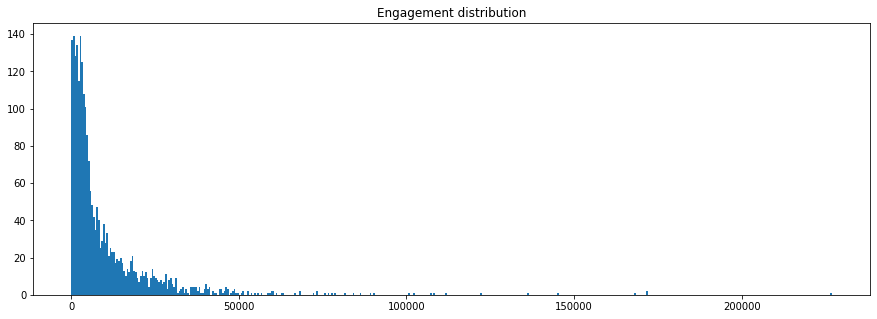

In [1321]:
# engagement distribution
plt.figure(figsize=[15,5])
binsize= 500
bins_e= np.arange(df.engagement.min(),df.engagement.max()+binsize, binsize)
plt.hist(data= df, x= "engagement", bins= bins_e)
plt.title("Engagement distribution")
plt.show()

This could be the case for a scale transformation. The distribution is heavily skewed to the right following an aproximate log-normal distribution. Let's try a logarithmic transformation to the data and see if it then follows a normal distribution.

In [1322]:
# getting min and max in log10
np.log10(df.engagement.describe())

count    3.367542
mean     3.998696
std      4.181855
min      1.278754
25%      3.344491
50%      3.677516
75%      4.078330
max      5.355497
Name: engagement, dtype: float64

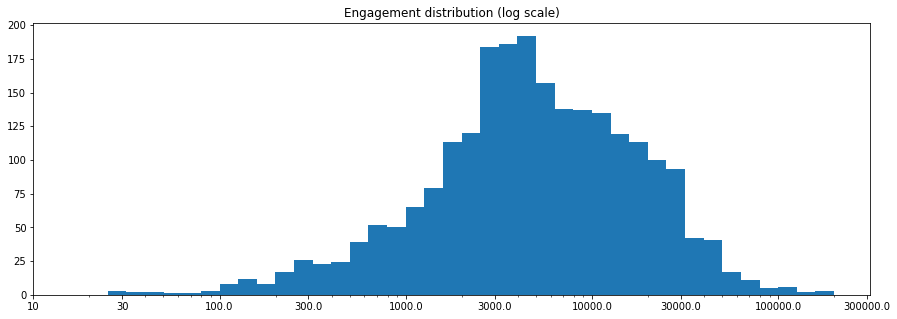

In [1323]:
# engagement distribution
plt.figure(figsize=[15,5])
ticks= [10, 30, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5]
labels= ["{}".format(v) for v in ticks]
bins_e= 10 ** np.arange(1.4, 5.4, .1)
plt.hist(data= df, x= "engagement", bins= bins_e)
plt.xscale("log")
plt.xticks(ticks, labels)
plt.title("Engagement distribution (log scale)")
plt.show()

As expected, once the logarithmic transformation is applied, the data looks more normally distributed, with the majority of tweets getting engaged from 3000 to 10000 times.

Let's now see which tweets got the least and most engaged.

In [1324]:
# least engaging tweet
df.query("engagement == engagement.min()")

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating,engagement
203,851861385021730816,2017-04-11 18:15:55.000000,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,None,101,0,19,8946446,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1.0,pencil_box,0.662183,0.0,None,1.0,19


Hum. That's interesting. The text for the least engaging tweet contains the string "RT" in the begning of it, which could be indicative of being a retweet. Let's see if that's actually the case.

In [1325]:
# automatic linebreaks and multi-line cells
pd.set_option('display.max_colwidth', None)

# least engaging tweet text
min_id= df.query("engagement == engagement.min()")["tweet_id"]
df[df.tweet_id == min_id.values[0]]["text"]

203    RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI
Name: text, dtype: object

#### Some RTs were left behind during the data cleaning process
By the looks of it, and according to [Twitter Retweet FAQs](https://help.twitter.com/en/using-twitter/retweet-faqs), our suspicions were correct: texts beginning with "RT" should be treted as retweets.

So, as we only want original tweets, let's get rid of them.

In [1326]:
# check how many tweets contain RT in the biginning of the text
df[df.text.str.startswith("RT") == True].shape[0]

165

In [1327]:
# list of RT tweet_ids 
rt_ids= list(df[df.text.str.startswith("RT") == True]['tweet_id'])

In [1328]:
# make df to be a dataframe not containing those tweet_ids
df= df[~df['tweet_id'].isin(rt_ids)]

In [1329]:
# test
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2330
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2166 non-null   object 
 1   timestamp          2166 non-null   object 
 2   source             2166 non-null   object 
 3   text               2166 non-null   object 
 4   expanded_urls      2108 non-null   object 
 5   name               1458 non-null   object 
 6   numb_of_char       2166 non-null   int64  
 7   favorites          2166 non-null   int64  
 8   retweets           2166 non-null   int64  
 9   followers          2166 non-null   int64  
 10  jpg_url            1986 non-null   object 
 11  img_num            1986 non-null   float64
 12  p1                 1986 non-null   object 
 13  p1_conf            1986 non-null   float64
 14  p1_dog             1986 non-null   float64
 15  dog_stages         362 non-null    object 
 16  normalized_rating  2162 

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating,engagement
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,85,35233,7430,8946443,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,0.0,None,1.3,42663
1,892177421306343426,2017-08-01 00:17:27.000000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,138,30496,5525,8946443,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,1.0,None,1.3,36021
2,891815181378084864,2017-07-31 00:18:03.000000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,121,22934,3647,8946443,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,1.0,None,1.2,26581
3,891689557279858688,2017-07-30 15:58:51.000000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,79,38515,7607,8946443,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,0.0,None,1.3,46122
4,891327558926688256,2017-07-29 16:00:24.000000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,Franklin,138,36788,8189,8946443,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,1.0,None,1.2,44977


Now that we have removed those RTs from the data, let's take a second look at the engagement distrinution.

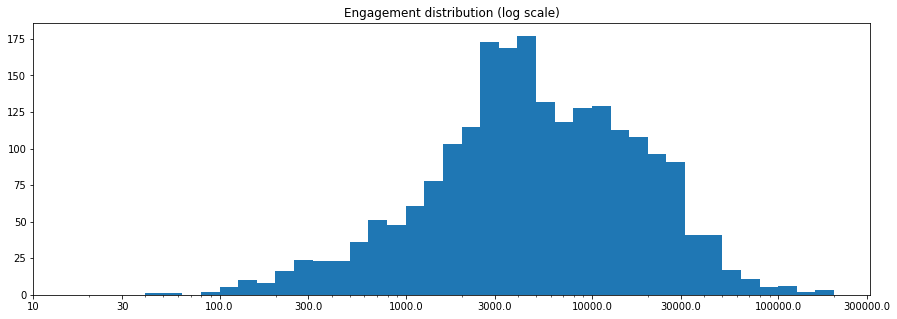

In [1330]:
# engagement distribution
plt.figure(figsize=[15,5])
ticks= [10, 30, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5]
labels= ["{}".format(v) for v in ticks]
bins_e= 10 ** np.arange(1.4, 5.4, .1)
plt.hist(data= df, x= "engagement", bins= bins_e)
plt.xscale("log")
plt.xticks(ticks, labels)
plt.title("Engagement distribution (log scale)")
plt.show()

The distribution seems to have not been altered by the RT. How about the least engaging tweet?

In [1331]:
# least engaging tweet
df.query("engagement == engagement.min()")

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating,engagement
1271,707983188426153984,2016-03-10 17:35:20.000000,Twitter for iPhone,@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :),None,None,139,48,2,8946474,None,NaN,None,NaN,NaN,None,1.2,50


In [1332]:
# most engaging tweet
df.query("engagement == engagement.max()")

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating,engagement
1015,744234799360020481,2016-06-18 18:26:18.000000,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,None,91,151728,74996,8946468,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,Labrador_retriever,0.825333,1.0,doggo,1.3,226724


In [1333]:
# least and most engaging tweet_ids
engage_tweets= df.query("engagement == engagement.min() or engagement == engagement.max()")["tweet_id"].values

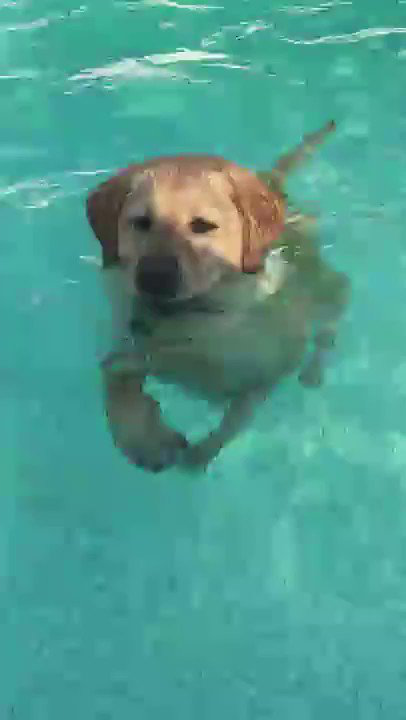

744234799360020481
1015    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Name: text, dtype: object
1015    226724
Name: engagement, dtype: int64
1015    Labrador_retriever
Name: p1, dtype: object

TWEET HAS NO IMAGE
707983188426153984
1271    @serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :)
Name: text, dtype: object
1271    50
Name: engagement, dtype: int64
1271    None
Name: p1, dtype: object


In [1334]:
# printing image (if any) and text
for index, t_id in enumerate(engage_tweets):
    image_url= str(df[df['tweet_id'] == engage_tweets[index]].jpg_url.values)
    
    # least engaging tweet has no jpg_url for image
    # this prints the photo for most engaging tweet
    if len(image_url) > 10:
        r= requests.get(image_url[2:-2])
        i= Image.open(BytesIO(r.content))
        display.display(i)
        print(engage_tweets[index]+'\n'+
              str(df[df['tweet_id'] == engage_tweets[index]].text)+'\n'+
              str(df[df['tweet_id'] == engage_tweets[index]].engagement)+'\n'+
              str(df[df['tweet_id'] == engage_tweets[index]].p1))
    
    # this prints the text for least engaging tweet
    else:
        print('\n'+'TWEET HAS NO IMAGE'+'\n'+
              engage_tweets[index]+'\n'+
              str(df[df['tweet_id'] == engage_tweets[index]].text)+'\n'+
              str(df[df['tweet_id'] == engage_tweets[index]].engagement)+'\n'+
              str(df[df['tweet_id'] == engage_tweets[index]].p1))

Nice! So, the most engaging tweet does depict a labrador retriever whereas the least one does not seem to have a photo. However, the text of the least engaging tweet indicates that WeRateDogs was actually rating a dog named Bernie 12/10. It could be the case that, unfortunately, during the data gathering process the jpg_url for that particular tweet got lost or, worse, it was never available in the data and, thus, would require further data gathering.

Anyhow. An interesting question came out of this:
#### 1.1\. Is there a difference in engagement for tweets with and without a dog image?

To answer this question, let's first remind ourselves that, for simplicity's sake, we're taking the p1_dog column entries at their face value, and, then, let's plot 2 histograms on the same axis comparing the distributions for tweets with and without a dog image.

In [1335]:
# separating df by p1_dog value
dog= df.query("p1_dog == 1")
no_dog= df.query("p1_dog == 0")

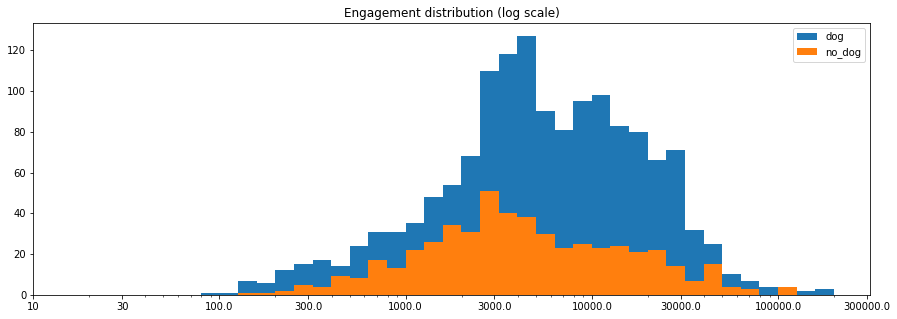

In [1336]:
# ploting histograms
fig, ax = plt.subplots(figsize=[15,5])
for a in [dog, no_dog]:
    ticks= [10, 30, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5]
    labels= ["{}".format(v) for v in ticks]
    bins_e= 10 ** np.arange(1.4, 5.4, .1)
    plt.hist(data= a, x= "engagement", bins= bins_e)
    plt.xscale("log")
    plt.xticks(ticks, labels)
    plt.legend(["dog", "no_dog"])
plt.title("Engagement distribution (log scale)")
plt.show()

[back to top](#table)

As one would have expected, there seems to be difference in engagement levels between tweets with and without the image of a dog. Tweets with it have, on average, more engagement than those without one. An important note should be made here, however. As we have seen before, a significant number of entries on p1_dog column set to "0" depicted, as a matter of fact, dogs. Therefore, this insight should be taken with a grain of salt.

Given the answer to the previdous question, the next logical question would be:
#### 1.2\. What dog breed created most and least engagement?
In order to answer this question, we're going to rely on the values of "p1_dog" column and filter the "p1" column for the dog breeds.

In [1337]:
# least engaged
print(df[df.p1_dog == 1].query("p1_dog == 1 and engagement == engagement.min()")[["tweet_id", "p1", "engagement"]])

# most engaged 
print(df[df.p1_dog == 1].query("p1_dog == 1 and engagement == engagement.max()")[["tweet_id", "p1", "engagement"]])

                tweet_id              p1  engagement
2314  666102155909144576  English_setter          80
                tweet_id                  p1  engagement
1015  744234799360020481  Labrador_retriever      226724


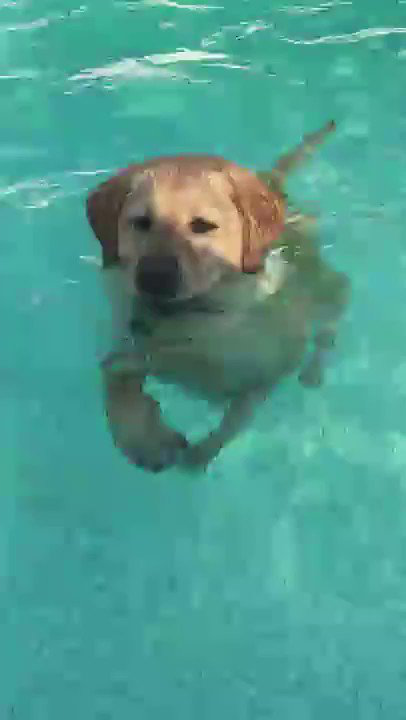

744234799360020481
1015    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Name: text, dtype: object
1015    226724
Name: engagement, dtype: int64
1015    Labrador_retriever
Name: p1, dtype: object


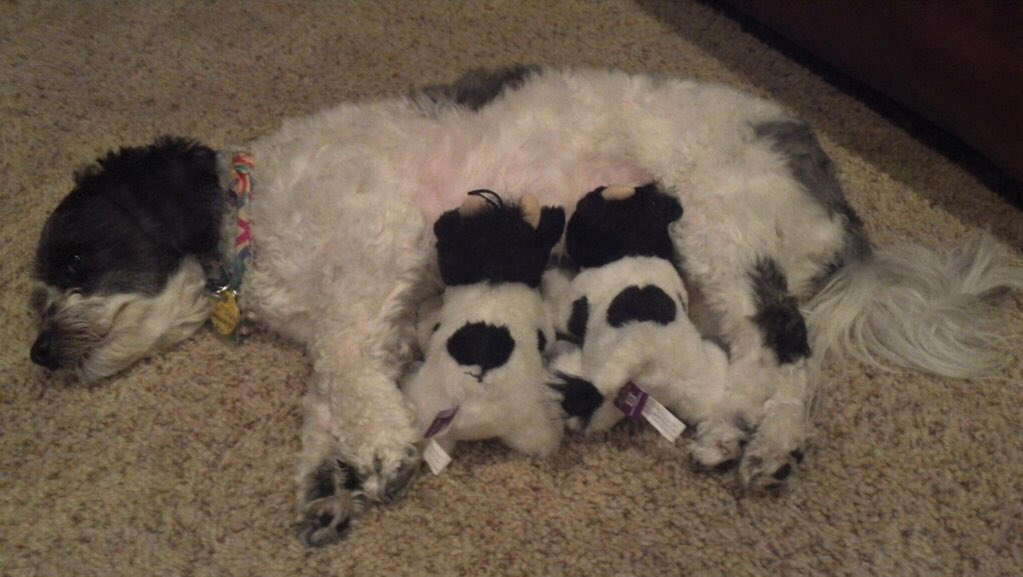

666102155909144576
2314    Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq
Name: text, dtype: object
2314    80
Name: engagement, dtype: int64
2314    English_setter
Name: p1, dtype: object


In [1338]:
# print image and text for most and least engaging tweets
# df with p1_dog == 1
df_dog= df[df.p1_dog == 1]

# getting tweet_ids
engage_t_id= []
for i in df_dog.tweet_id:
    if df_dog[df_dog.tweet_id == i].engagement.values == df_dog.engagement.min():
        engage_t_id.append(i)
    elif df_dog[df_dog.tweet_id == i].engagement.values == df_dog.engagement.max():
        engage_t_id.append(i)
    else:
        None

# printing image and text
for index, t_id in enumerate(engage_t_id):
    image_url= str(df[df['tweet_id'] == engage_t_id[index]].jpg_url.values)
    r= requests.get(image_url[2:-2])
    i= Image.open(BytesIO(r.content))
    display.display(i)
    print(engage_t_id[index]+'\n'+
              str(df[df['tweet_id'] == engage_t_id[index]].text)+'\n'+
              str(df[df['tweet_id'] == engage_t_id[index]].engagement)+'\n'+
              str(df[df['tweet_id'] == engage_t_id[index]].p1))

From the information above, we can say that from the tweets which contained the image of a dog, the most engaging had a *labrador retriever*, whereas the least engaging, an *English setter*.

Now, with that past us, it would be interesting to find out which dog breeds, on average, created most engagement. Which leads us to our second question:

[back to top](#table)
<a id='question2'></a>
### 2. Do dog breeds, on average, get rated differently?

First, let's check how many unique dog breeds are in the dataset.

In [1339]:
# checking how many unique breeds there are
df.query("p1_dog == True").p1.nunique()

111

In [1340]:
# checking unique breeds
df.query("p1_dog == True").p1.sort_values().unique()

array(['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
       'Appenzeller', 'Australian_terrier', 'Bedlington_terrier',
       'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie',
       'Border_terrier', 'Boston_bull', 'Brabancon_griffon',
       'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever',
       'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_setter',
       'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog',
       'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter',
       'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog',
       'Ibizan_hound', 'Irish_setter', 'Irish_terrier',
       'Irish_water_spaniel', 'Italian_greyhound', 'Japanese_spaniel',
       'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa',
       'Maltese_dog', 'Mexican_hairless', 'Newfoundland',
       'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier',
       'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Pomera

Ideally, given the large number of unique breeds in the dataset, we'd like to use [unsupervised machine learning](https://developer.ibm.com/technologies/artificial-intelligence/articles/cc-unsupervised-learning-data-classification/) to cluster those categories into groups defined by, preferebly, their physical characteristics. But, that's outside the scope of the current project.

That being said, what we're going to do is to set a threshhold from which we'll consider a dog breed for analysis. That's to say, we'll set a minimum of 50 occurrences of a specific dog breed.

In [1341]:
# sets min 50 occurrences
engage_breeds= df.groupby('p1').filter(lambda x: len(x) > 50).sort_values('engagement')
print(engage_breeds.shape[0])
engage_breeds.p1.value_counts()

453


golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

And, by doing so, we're down to the top 5 out of 111 dog breeds in the dataset. Great!

Let's now check the distribution of engagement for those and, if necessary, get rid of any potential outliers.

In [1342]:
# checking engagement distributions
engage_breeds.groupby('p1')['engagement'].describe().sort_values('mean', ascending= False)

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
golden_retriever,139.0,14189.791367,15607.599925,218.0,4137.00,9211.0,17950.5,100709.0
Labrador_retriever,93.0,13635.612903,25858.426015,372.0,2454.00,6384.0,17589.0,226724.0
Pembroke,88.0,13013.965909,13730.870368,222.0,3788.75,7582.0,19705.0,78579.0
Chihuahua,79.0,10373.683544,21415.331433,152.0,1673.50,3628.0,11714.5,171831.0
pug,54.0,6800.407407,9153.036268,141.0,2078.50,3061.0,7131.0,38488.0


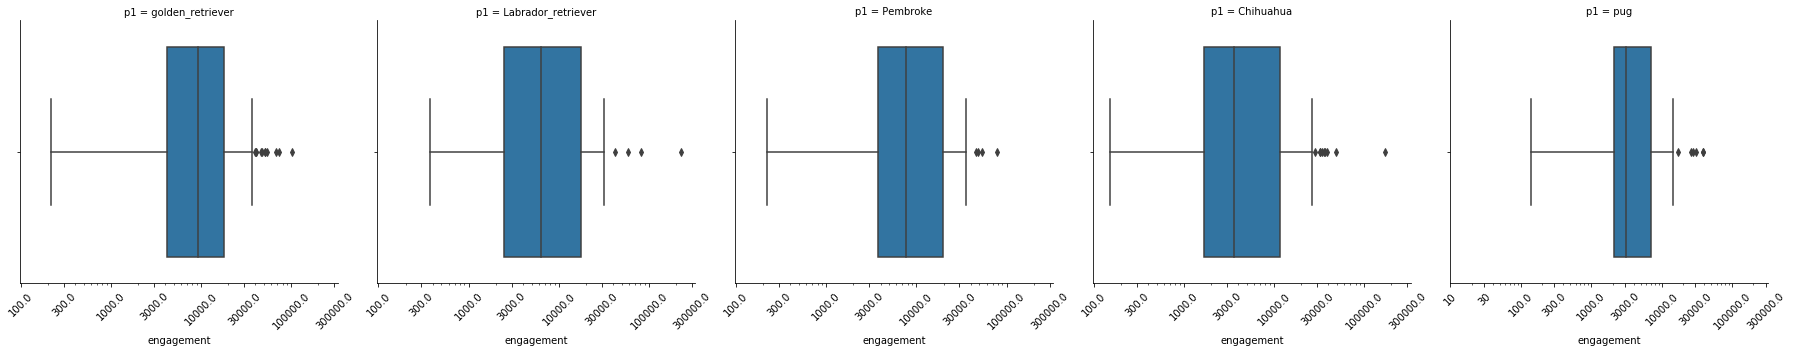

In [1343]:
# check those engagement distributions
dog_breeds= engage_breeds.groupby('p1')['engagement'].describe().sort_values('mean', ascending= False).index.tolist()
ticks= [10, 30, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5]
labels= ["{}".format(v) for v in ticks]
g= sb.FacetGrid(data=engage_breeds, col='p1', col_wrap= 5, height=5, col_order= dog_breeds)
g.map(sb.boxplot, 'engagement', order= dog_breeds)
g.set(xscale = 'log')
plt.xticks(ticks, labels)

# adding xticks to all rows, if necessary
#[ax.tick_params(labelbottom=True) for ax in g.axes.flatten()]

# rotating xticks on all rows
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat] 

# increase space between rows
g.fig.tight_layout()

plt.show()

All right! From both the information and the graph above, it seems that different dog breeds generate different levels of engagement, with *golden retrievers* seeming to be the ones with better engagement. Important to notice, however, that there are some outliers within each dog breed. Let's now get rid of them and, then, see which dog breed, on average, have the best engagement level.

In [1344]:
# reset_index so indices will match
clean_breeds= engage_breeds.copy()
clean_breeds= clean_breeds.reset_index(drop=True)

In [1345]:
# picking outliers indices
dog_breeds= clean_breeds.p1.value_counts().index.tolist()
index_tracker= []

# loop through 'engagement' by dog breed ('p1)' and interquartile (IQR)
for breed in dog_breeds:
    Q1 = clean_breeds[clean_breeds['p1'].values== breed]['engagement'].quantile(0.25)
    Q3 = clean_breeds[clean_breeds['p1'].values== breed]['engagement'].quantile(0.75)
    IQR = Q3 - Q1
    for i in clean_breeds.index:
        if not(clean_breeds['engagement'].values[i] >= (Q1 - 1.5 * IQR)) & (clean_breeds['engagement'].values[i] <= (Q3 + 1.5 *IQR)) and i not in index_tracker:
            index_tracker.append(i)
        else:
            None

In [1346]:
# test
print('Total number of outliers: ' + str(len(index_tracker)))

Total number of outliers: 125


In [1347]:
# droping outliers
clean_breeds = clean_breeds.drop(index_tracker, axis= 0)

In [1348]:
# get means and order from top to bottom
clean_breeds.groupby('p1').engagement.describe().sort_values('mean', ascending= False)

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
golden_retriever,93.0,6195.849462,4306.551054,218.0,2599.00,5043.0,9211.00,14632.0
Pembroke,61.0,5604.786885,3673.115395,222.0,3110.00,4678.0,8259.00,13694.0
Labrador_retriever,63.0,4485.428571,3417.852253,372.0,1865.00,3714.0,6618.00,13114.0
pug,48.0,3919.812500,3355.174522,141.0,1883.25,2968.5,4209.25,14537.0
Chihuahua,63.0,3559.873016,3357.565033,152.0,1307.50,2544.0,4254.50,13615.0


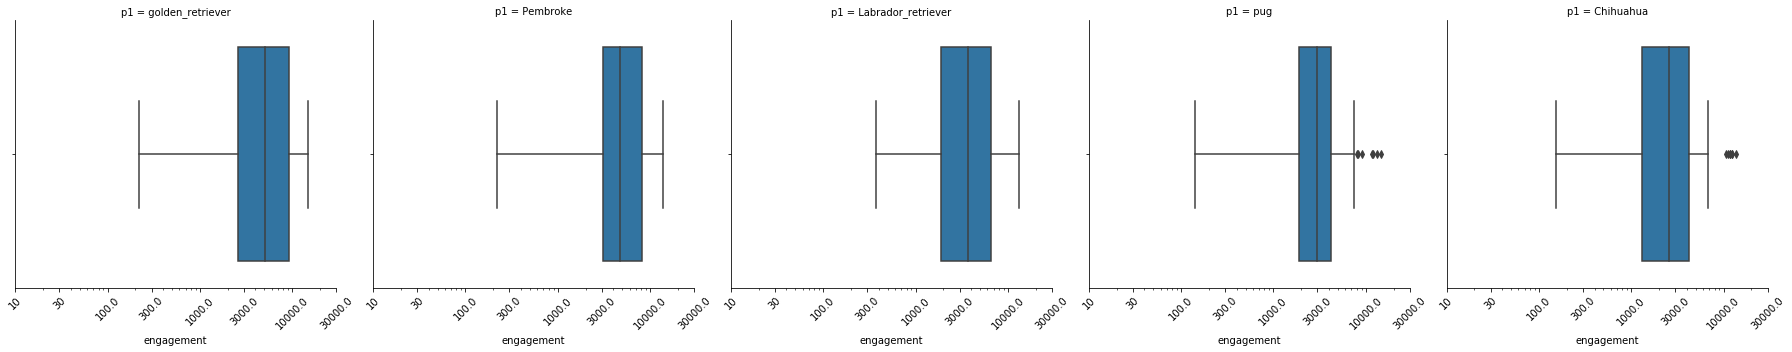

In [1349]:
# re-check engagement without outliers
dog_breeds= clean_breeds.groupby('p1').engagement.describe().sort_values('mean', ascending= False).index.tolist()
ticks= [10, 30, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5]
labels= ["{}".format(v) for v in ticks]
g= sb.FacetGrid(data=clean_breeds, col='p1', col_wrap= 5, height=5, col_order= dog_breeds)
g.map(sb.boxplot, 'engagement', order= dog_breeds)
g.set(xscale = 'log')
plt.xticks(ticks, labels)
plt.xlim(10, 3e4)

# adding xticks to all rows, if necessary
#[ax.tick_params(labelbottom=True) for ax in g.axes.flatten()]

# rotating xticks on all rows
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat] 

# increase space between rows
g.fig.tight_layout()

plt.show()

Ok! After cleaning for outliers, we can already see some changes. First of all, as expected, the average engagement for all breeds have suffered a considerable reduction: from about 7k-10k, down to 3k-6k. Secondly, *pembrokes* overtook *labrador retrievers*, falling behing only to *golden retrievers*. Also, *pugs* took the 4th place from *chihuahuas*.

That being said, a couple of remarks must be made at this point:
   * The number of occurrences for different breeds of dogs varies. In other words, had the number of observations been equal for all breeds, the results could have been different;
   * The change in the mean for all breeds shows the importance of taking outliers into consideration when analyzing the data;
   * Given tha large number of dog breeds, as mentioned before, it'd be interesting to see the results of categorizing them using machine learning.
   
Finally, let's tackle the final question:

[back to top](#table)
<a id='question3'></a>
### 3. Is there a correlation between rate and engagement?
For visualizing that, let's keep it simple and use a scatter plot.

In [1350]:
# checking how both columns look like
df[['normalized_rating', 'engagement']].describe()

,normalized_rating,engagement
count,2162.000000,2166.000000
mean,1.224376,10273.426131
std,4.259064,15645.273012
min,0.000000,50.000000
25%,1.000000,2195.750000
50%,1.100000,4754.000000
75%,1.200000,12469.750000
max,177.600000,226724.000000


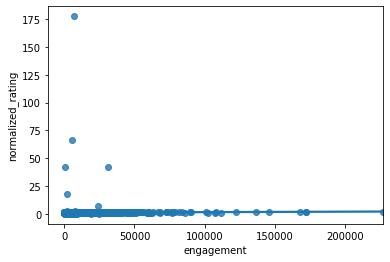

In [1351]:
# scatter plot rate v engagement
sb.regplot(data=df, x='engagement', y='normalized_rating');

Alright. When it comes to rating, we clearly have some remarkable outilers here. Let's take a quick look at them.

In [1352]:
# checking outliers
Q1= df.normalized_rating.quantile(0.25)
Q3= df.normalized_rating.quantile(0.75)
IQR= Q3 - Q1
query= "normalized_rating < (@Q1 - 1.5*@IQR) or normalized_rating > (@Q3 + 1.5*@IQR)"
df.query(query)

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating,engagement
44,883482846933004288,2017-07-08 00:28:19.000000,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",https://twitter.com/dog_rates/status/883482846933004288/photo/1,Bella,112,41893,8695,8946444,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082,1.0,None,0.5,50588
54,881633300179243008,2017-07-02 21:58:53.000000,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,None,None,78,116,7,8946444,None,NaN,None,NaN,NaN,None,1.7,123
180,855862651834028034,2017-04-22 19:15:32.000000,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,None,None,72,314,22,8946446,None,NaN,None,NaN,NaN,None,42.0,336
181,855860136149123072,2017-04-22 19:05:32.000000,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",None,None,128,4628,900,8946446,None,NaN,None,NaN,NaN,None,66.6,5528
220,848212111729840128,2017-04-01 16:35:01.000000,Twitter for iPhone,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",https://twitter.com/dog_rates/status/848212111729840128/photo/1,Jerry,138,15715,2872,8946447,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1.0,Bedlington_terrier,0.333486,1.0,None,0.6,18587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,666082916733198337,2015-11-16 02:38:37.000000,Twitter for iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,https://twitter.com/dog_rates/status/666082916733198337/photo/1,None,125,100,41,8946506,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1.0,pug,0.489814,1.0,None,0.6,141
2324,666051853826850816,2015-11-16 00:35:11.000000,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,None,138,1092,745,8946506,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,box_turtle,0.933012,0.0,None,0.2,1837
2326,666049248165822465,2015-11-16 00:24:50.000000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,None,120,94,39,8946506,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,1.0,None,0.5,133
2327,666044226329800704,2015-11-16 00:04:52.000000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,Morgan,137,262,123,8946506,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,1.0,None,0.6,385


The information above reveals that, in total, we've got 182 outliers, of which some are actually errors when extracting numerators from the text. Given the small number of them when compared to the whole dataset, we'll just leave them out of the analysis. Now, let's try that scatter plot again.

In [1353]:
# leaving outliers out
query= "normalized_rating >= (@Q1 - 1.5*@IQR) and normalized_rating <= (@Q3 + 1.5*@IQR)"
df_clean= df.query(query)

In [1354]:
# test
df_clean.sample(n= 5, random_state= 2021)

,tweet_id,timestamp,source,text,expanded_urls,name,numb_of_char,favorites,retweets,followers,jpg_url,img_num,p1,p1_conf,p1_dog,dog_stages,normalized_rating,engagement
2238,667544320556335104,2015-11-20 03:25:43.000000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,Kial,139,800,487,8946506,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,0.412893,1.0,None,1.0,1287
1162,718540630683709445,2016-04-08 20:46:50.000000,Twitter for iPhone,Get you a pup that can do both. 10/10 https://t.co/zSbyvm62xZ,https://twitter.com/dog_rates/status/718540630683709445/photo/1,None,61,2361,969,8946471,https://pbs.twimg.com/media/CfjE5FRXEAErFWR.jpg,2.0,Maltese_dog,0.632289,1.0,None,1.0,3330
657,789530877013393408,2016-10-21 18:16:44.000000,Twitter for iPhone,This is Rizzy. She smiles a lot. 12/10 contagious af https://t.co/TU4sZogVIq,https://twitter.com/dog_rates/status/789530877013393408/photo/1,Rizzy,52,11624,3341,8946447,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3.0,schipperke,0.363272,1.0,None,1.2,14965
2264,667174963120574464,2015-11-19 02:58:01.000000,Twitter for iPhone,"This is Clarence. His face says he doesn't want to be a donkey, but his tail is super pumped about it. 9/10 https://t.co/fGDWgukcBs",https://twitter.com/dog_rates/status/667174963120574464/photo/1,Clarence,131,230,71,8946506,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1.0,toy_poodle,0.266437,1.0,None,0.9,301
368,826958653328592898,2017-02-02 01:01:21.000000,Twitter for iPhone,This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,https://twitter.com/dog_rates/status/826958653328592898/photo/1,Loki,73,21198,4865,8946446,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1.0,golden_retriever,0.617389,1.0,doggo,1.2,26063


In [1355]:
# checking the looks of it
df_clean[['normalized_rating', 'engagement']].describe()

,normalized_rating,engagement
count,1980.000000,1980.000000
mean,1.109949,10861.145960
std,0.143327,16143.964987
min,0.800000,50.000000
25%,1.000000,2438.750000
50%,1.100000,5114.500000
75%,1.200000,13391.250000
max,1.500000,226724.000000


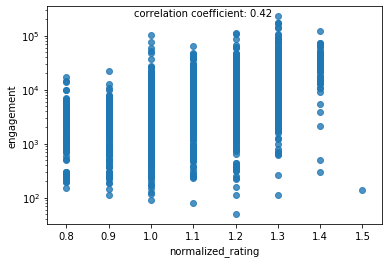

In [1356]:
# rate v engagement
corr= df_clean.engagement.corr(df_clean.normalized_rating)
sb.regplot(data=df_clean, y='engagement', x='normalized_rating', fit_reg= False);
plt.yscale('log');
plt.text(s='correlation coefficient: {:.2f}'.format(corr), y=df_clean.engagement.max()+100,
         x=.96);

Surprisingly, it seems that there's only a moderate correlation between engagement and rating. Other variables could be playing a bigger role than anticipated, for instance, dog breed and, as a consequence, the dog's physical characteristics. Also, the text of the tweet itself could be relevant on this matter. For example, we could ascertain whether the text being positive, negative or neutral would have any effect on the engagement levels. This could be done through [sentiment analysis](https://medium.com/dev-genius/training-an-ml-model-for-sentiment-analysis-in-python-63b6b8c68792), but that would be out of the scope of the current project.

[back to top](#table)

<a id='conclusions'></a>
# Conclusions - "They are good dogs Brent"

Nicely done! So, we could summarize our findings as follows:
   * 1\. It could be interesting to reviw the neural network used to identify the dogs on all tweets. It seems that it could be improved, given that many images with p1_dog value set as "False" actually depicted a dog;
   * 2\. The engagement distribution is heavily skewed to the right following a log-normal distribution. The bulk of the distribution is within the 3k-10k range;
   * 3\. Tweets which depict a dog perform better in terms of engagement and, yes, different dog breeds perform differently, with *golden retrievers* being the most engaging dogs;
   * 4\. Finally, rates have a surprisingly moderate correlation with engagement. This could be indicative of the fact that there are some hidden variables out there influencing the level of engagement (e.g., dog breed, text sentiment, etc). As curiosity is a inherently human characteristic, we are very likely to dive into those hypothesis soon.

[back to top](#table)
<a id='references'></a>
## References

[os.path - Common pathname manipulations](https://docs.python.org/3/library/os.path.html#module-os.path)

[Requests library for python](https://requests.readthedocs.io/en/master/#requests-http-for-humans)

[NumPy Documentation](https://numpy.org/doc/)

[Pandas Documentation](https://pandas.pydata.org/docs/)

[Matplotlib Documentation](https://matplotlib.org/contents.html)

[Seaborn Documentation](https://seaborn.pydata.org)

[Tweepy documentation](http://docs.tweepy.org/en/latest/api.html)

[JSON encoder and decoder](https://docs.python.org/3/library/json.html#module-json)

[Avoid Twitter API limitation with Tweepy](https://stackoverflow.com/a/31866907/13043172)

[What is a social media engagement rate?](https://www.contentcal.io/blog/what-is-a-good-social-media-engagement-rate/)

[Twitter Retweet FAQs](https://help.twitter.com/en/using-twitter/retweet-faqs)

[Unsupervised learning for data classification](https://developer.ibm.com/technologies/artificial-intelligence/articles/cc-unsupervised-learning-data-classification/)

[Training an ML Model for Sentiment Analysis in Python](https://medium.com/dev-genius/training-an-ml-model-for-sentiment-analysis-in-python-63b6b8c68792)

[Rotating xtick labels in Seaborn FacetGrid plots](https://github.com/mwaskom/seaborn/issues/867#issuecomment-184918644)

[Repeating x axis labels for all facets using FacetGrid in seaborn](https://stackoverflow.com/a/52184614/13043172)